In [1]:
from wgan import *
from gen import *
from critic import *

In [30]:
db_train, db_test = load_data(0.8)

(327680, 2000, 1)
0.1096587927896593 -0.11733959855510472
1.0 -1.0


In [39]:
run = 9
number = 250
path_gen = f'runs/{run}/{number}_gen.h5'
path_critic = f'runs/{run}/{number}_critic.h5'
gen = load_model(path_gen)
critic = load_model(path_critic)
critic.trainable = True

W0730 23:25:56.010555 47842967039488 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0730 23:25:56.994340 47842967039488 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


## Inizializzo ultimo layer convoluzionale con l'identità o con un filtro che media

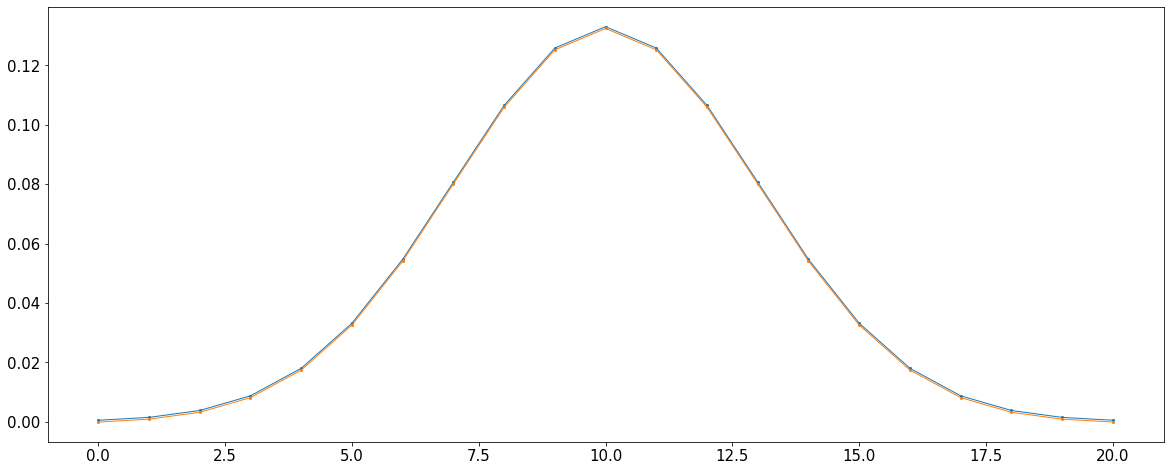

In [42]:
import scipy.stats as stat
filter_dim = 21
xx = np.arange(0,21)
w1 = stat.norm((filter_dim-1)/2, 3).pdf(xx)
w1 = w1/w1.sum()
plt.plot(xx,w1)
plt.plot(xx,bb)

In [25]:
#w1 = np.array(np.r_[[0.]*10,[1.],[0.]*10])
#w1 = w1.reshape(21,1,1)
#hardcoded_weights = [w1,np.array([0.])]
import scipy.stats as stat
filter_dim = 21
xx = np.arange(0,21)
w1 = stat.norm((filter_dim-1)/2, 3).pdf(xx)
w1 = w1/w1.sum()
w1 = w1.reshape(21,1,1)
hardcoded_weights = [w1,np.array([0.])]

In [26]:
gen.add(Conv1D(1, 21, padding='same', weights=hardcoded_weights))

In [31]:
wgan = WGANGP(gen, critic, noise_dim=100, n_critic=30, batch_size=1000, text='prova')
wgan.train(2000, db_train, db_test)

W0730 23:01:33.985079 47842967039488 training.py:2197] Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?



NCRITIC = 30

Gen_Iter:      0 [D loss:  1.71e-02] [d_loss_test:  0.00e+00] [G loss:  4.57e+00]
Gen_Iter:      1 [D loss:  2.01e-02] [d_loss_test:  0.00e+00] [G loss:  4.58e+00]
Gen_Iter:      2 [D loss:  1.91e-03] [d_loss_test:  0.00e+00] [G loss:  4.58e+00]
Gen_Iter:      3 [D loss:  8.75e-04] [d_loss_test:  0.00e+00] [G loss:  4.57e+00]
Gen_Iter:      4 [D loss: -2.49e-02] [d_loss_test:  0.00e+00] [G loss:  4.58e+00]
Gen_Iter:      5 [D loss:  2.60e-03] [d_loss_test:  0.00e+00] [G loss:  4.58e+00]
Gen_Iter:      6 [D loss:  4.28e-02] [d_loss_test:  0.00e+00] [G loss:  4.56e+00]
Gen_Iter:      7 [D loss:  3.32e-02] [d_loss_test:  0.00e+00] [G loss:  4.56e+00]
Gen_Iter:      8 [D loss:  5.78e-02] [d_loss_test:  0.00e+00] [G loss:  4.56e+00]
Gen_Iter:      9 [D loss:  6.99e-02] [d_loss_test:  0.00e+00] [G loss:  4.54e+00]
Gen_Iter:     10 [D loss:  3.54e-02] [d_loss_test:  0.00e+00] [G loss:  4.55e+00]
Gen_Iter:     11 [D loss:  2.41e-02] [d_loss_test:  0.00e+00] [G loss:  4.55e+00]
G

KeyboardInterrupt: 

In [27]:
aa = gen.predict(np.random.normal(0,1,(1,100)))

In [6]:
plt.rcParams['font.size'] = 26
#plt.rcParams['axes.labelsize'] = 10
#plt.rcParams['axes.labelweight'] = 'bold'
#plt.rcParams['axes.titlesize'] = 13
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 22
plt.rcParams['figure.titlesize'] = 22
#plt.rcParams['image.cmap'] = 'jet'
#plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (20, 8)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 4
plt.rcParams['legend.markerscale'] = 4
plt.rcParams['lines.marker'] = '.'

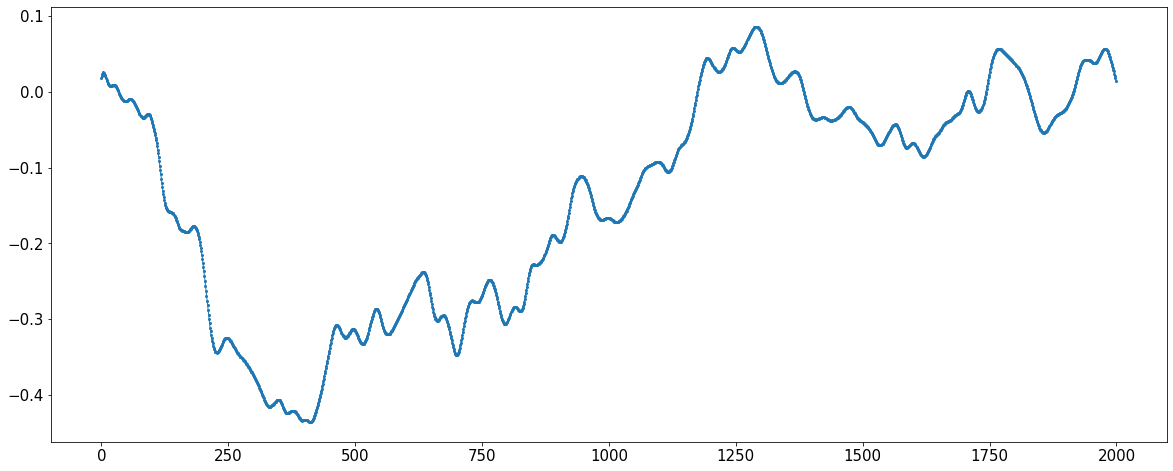

In [28]:
plt.plot(aa[0,:,0])

In [40]:
w = gen.get_weights()

In [41]:
bb = w[32].reshape(21)